In [23]:
import pandas as pd

df = pd.read_csv('search/search_cifar_cluster.csv')
df = df[~df['predictor'].isin(['gcn', 'seminas', 'nao'])].copy()
#df2 = pd.read_csv('predictors/runs_nb101_ui.csv')
#df = pd.concat([df, df2]).reset_index()

In [31]:
df['total_time'] = df['runtime'] + df['train_time']
df.columns

Index(['benchmark', 'predictor', 'seed', 'dataset', 'valid_acc_step',
       'runtime_step', 'train_time_step', 'step', 'valid_acc', 'runtime',
       'train_time', 'total_time'],
      dtype='object')

In [38]:
grouped_data = df.groupby(['benchmark', 'dataset', 'predictor', 'step']).mean().loc['nasbench201'].loc['cifar10']

for i in df.index:
    row = df.loc[i]
    
    vals = grouped_data.loc[row['predictor']].loc[row['step']]
    
    for k in ['total_time', 'runtime', 'train_time']:
        df.loc[i, f"{k}_grouped"] = vals[k]

KeyboardInterrupt: 

In [42]:
for p in df['predictor'].unique():
    print(p)
    for s in df['step'].unique():
        vals = grouped_data.loc[p].loc[s]
        
        for k in ['total_time', 'runtime', 'train_time']:
            df.loc[(df['predictor'] == p) & (df['step'] == s), f"{k}_grouped"] = vals[k]

graph_features
xgb
dngo
bananas
bohamiann
mlp
lgb
rf
bayes_lin_reg
ngb
sparse_gp
var_sparse_gp
gp
graph_features_xgb
graph_features_xgb_params


In [25]:
run_count = 50 * 500

# check if nothing missing
assert (df.groupby(['benchmark', 'predictor']).count()['seed'] == run_count).all()
assert len(df['benchmark'].unique()) == 1 and len(df['dataset'].unique()) == 1

In [18]:
import numpy as np

def compute_time(include_fit=False, round=3):
    plot_time = df['train_time'] + df['runtime'] if include_fit else df['train_time']
    return plot_time.round(3)

df['train_time_round'] = compute_time()
df['total_time'] = compute_time(include_fit=True)

In [43]:
import os

!cd search
if not os.path.exists('results'):
    os.mkdir('results')

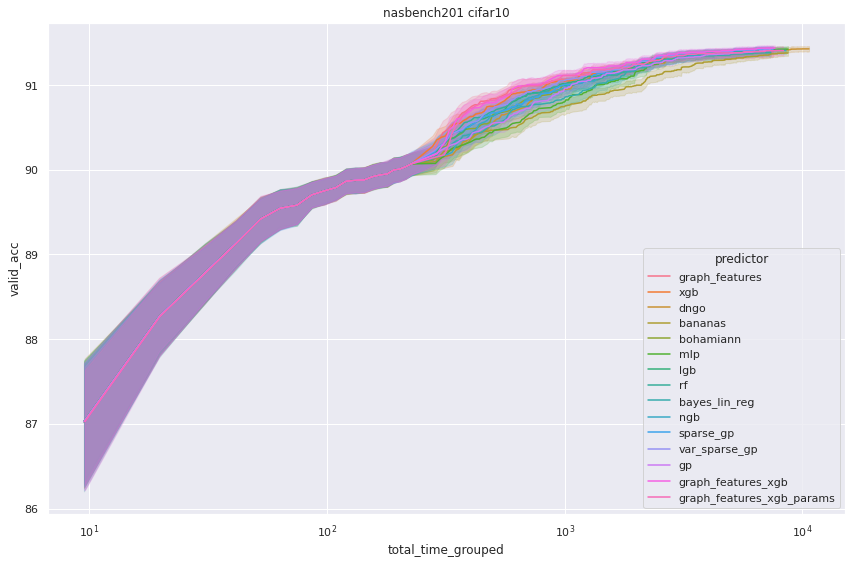

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

bench = df.iloc[0]['benchmark']
dataset = df.iloc[0]['dataset']
metric = 'valid_acc'

plot_df = df
#plot_df = df[(df['predictor'] == 'graph_features_xgb_params') | ~df['predictor'].str.contains('bananas')]
#plot_df = df[(df['predictor'] == 'bananas') | df['predictor'].str.contains('graph')]
#plot_df = df[(df['predictor'] != 'bananas')]

plt.figure(figsize=(12,8))

for p in pred

#sns.lineplot(data=plot_df, x='total_time_grouped', y=metric, hue='predictor', errorbar='ci')
plt.title(f"{bench} {dataset}")
plt.xscale('log')
#plt.xlim(3, 2e4)
plt.tight_layout()

#plt.savefig(f'search/results/{bench}_{dataset}_{metric}.png')
plt.show()

In [33]:
df[df['train_size'] == 500][['predictor', 'fit_time', 'train_time']].groupby('predictor').mean()

,fit_time,train_time
predictor,,
bananas,698.166889,3.981655e+06
bayes_lin_reg,0.217027,3.981655e+06
bohamiann,0.440444,3.981655e+06
bonas,481.096655,3.981655e+06
dngo,84.426334,3.981655e+06
gcn,712.954819,3.981655e+06
gp,0.032942,3.981655e+06
graph_features,12.395898,3.981655e+06
graph_features_tune,492.261738,3.981655e+06
